In [1]:
import numpy as np
import pandas as pd
import scipy 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
amazon = open('amazon_cells_labelled.txt', mode = 'r+')
text = amazon.readlines()
print ('This file is {} lines long.'.format(len(text)))
for line in text:
    print(line)

This file is 1000 lines long.
So there is no way for me to plug it in here in the US unless I go by a converter.	0

Good case, Excellent value.	1

Great for the jawbone.	1

Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0

The mic is great.	1

I have to jiggle the plug to get it to line up right to get decent volume.	0

If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0

If you are Razr owner...you must have this!	1

Needless to say, I wasted my money.	0

What a waste of money and time!.	0

And the sound quality is great.	1

He was very impressed when going from the original battery to the extended battery.	1

If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0

Very good quality though	1

The design is very odd, as the ear "clip" is not very comfortable at all.	0

Highly recommend for any one who has a blue tooth phone.	1

I a

In [3]:
df = pd.read_table('amazon_cells_labelled.txt', names=('Message', 'Sentiment'))

keywords = ['good', 'excellent', 'great', 'must have', 'impressed', 'quality', 'recommend', 'loved', 'best', 'ideal', 'well', 'nice', 'right', 'has', 'neat', 'love', 'reasonable', 'works', 'happy', 'cool', 'comfortable', 'beautiful', 'seamlessly', 'fast', 'simple', 'comfortably', 'pleased', 'brilliant', 'nicely']

for key in keywords:
    df[str(key)] = df.Message.str.contains(' ' + str(key) + ' ', case=False)


In [4]:
df['Sentiment'] = (df['Sentiment'] == 1)

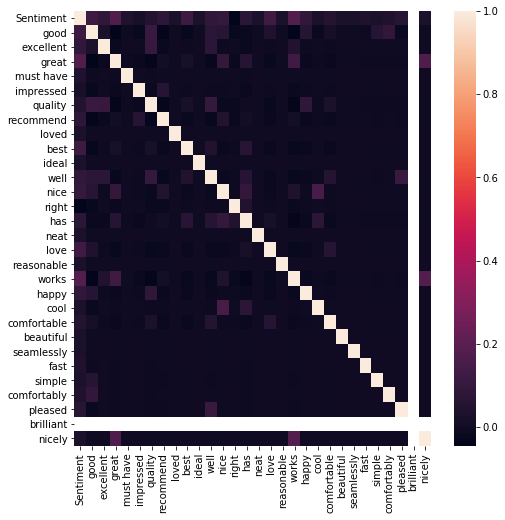

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr())

In [6]:
data = df[keywords]
target = df['Sentiment']

In [7]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print('Number of mislabeled points out of a total {} points : {}'.format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 331


In [9]:
# 1. Create keywords that identify positive sentiments
# 2. Turn Sentiment column into boolian
# 3. Create heatmap to make sure features are independent of eachother
# 4. Define training data: input data and outcome data(Target)
# 5. Review Success Metric
# 6. Improve model
# 386
# 348
# 336
# 331

My features are a compilation of kewyords that are explicitely identifiable with positive sentiments. The more keywords that are inlcuded, the more accurate the model predicts the data,